#1. Darknet Clone

GPU

In [1]:
# clone repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15072, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15072 (delta 0), reused 1 (delta 0), pack-reused 15069
Receiving objects: 100% (15072/15072), 13.46 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (10244/10244), done.


In [2]:
!ls -al darknet

total 260
drwxr-xr-x 14 root root  4096 Jun 10 15:24 .
drwxr-xr-x  1 root root  4096 Jun 10 15:24 ..
drwxr-xr-x  4 root root  4096 Jun 10 15:24 3rdparty
drwxr-xr-x  3 root root  4096 Jun 10 15:24 build
-rwxr-xr-x  1 root root 22150 Jun 10 15:24 build.ps1
drwxr-xr-x  3 root root  4096 Jun 10 15:24 cfg
drwxr-xr-x  2 root root  4096 Jun 10 15:24 .circleci
drwxr-xr-x  3 root root  4096 Jun 10 15:24 cmake
-rw-r--r--  1 root root 24381 Jun 10 15:24 CMakeLists.txt
-rw-r--r--  1 root root  1406 Jun 10 15:24 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9469 Jun 10 15:24 darknet_images.py
-rw-r--r--  1 root root 10334 Jun 10 15:24 darknet.py
-rw-r--r--  1 root root  6694 Jun 10 15:24 darknet_video.py
drwxr-xr-x  3 root root  4096 Jun 10 15:24 data
drwxr-xr-x  8 root root  4096 Jun 10 15:24 .git
drwxr-xr-x  4 root root  4096 Jun 10 15:24 .github
-rw-r--r--  1 root root   667 Jun 10 15:24 .gitignore
-rwxr-xr-x  1 root root   110 Jun 10 15:24 image_yolov3.sh
-rwxr-xr-x  1 root root   110 Jun 10 

In [3]:
%cd darknet

/content/darknet


In [4]:
!ls -al

total 260
drwxr-xr-x 14 root root  4096 Jun 10 15:24 .
drwxr-xr-x  1 root root  4096 Jun 10 15:24 ..
drwxr-xr-x  4 root root  4096 Jun 10 15:24 3rdparty
drwxr-xr-x  3 root root  4096 Jun 10 15:24 build
-rwxr-xr-x  1 root root 22150 Jun 10 15:24 build.ps1
drwxr-xr-x  3 root root  4096 Jun 10 15:24 cfg
drwxr-xr-x  2 root root  4096 Jun 10 15:24 .circleci
drwxr-xr-x  3 root root  4096 Jun 10 15:24 cmake
-rw-r--r--  1 root root 24381 Jun 10 15:24 CMakeLists.txt
-rw-r--r--  1 root root  1406 Jun 10 15:24 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9469 Jun 10 15:24 darknet_images.py
-rw-r--r--  1 root root 10334 Jun 10 15:24 darknet.py
-rw-r--r--  1 root root  6694 Jun 10 15:24 darknet_video.py
drwxr-xr-x  3 root root  4096 Jun 10 15:24 data
drwxr-xr-x  8 root root  4096 Jun 10 15:24 .git
drwxr-xr-x  4 root root  4096 Jun 10 15:24 .github
-rw-r--r--  1 root root   667 Jun 10 15:24 .gitignore
-rwxr-xr-x  1 root root   110 Jun 10 15:24 image_yolov3.sh
-rwxr-xr-x  1 root root   110 Jun 10 

In [5]:
# change makefile to have GPU, OPENCV, CUDNN
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [7]:
# compile sources
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [8]:
from google.colab import files
files.download('darknet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-06-10 15:27:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  37.7MB/s    in 6.7s    

2021-06-10 15:27:39 (35.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [10]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

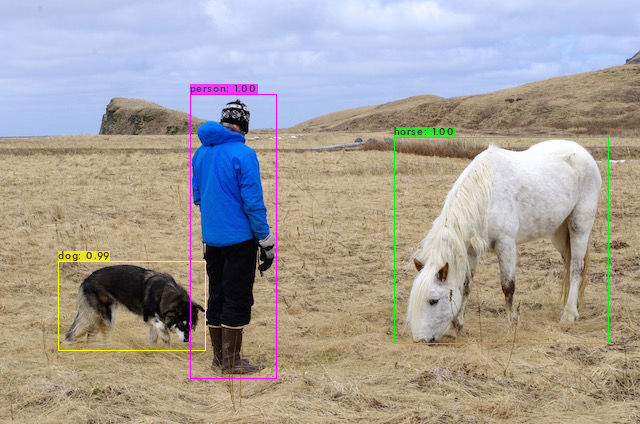

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

result = cv2.imread('predictions.jpg')
cv2_imshow(result)

#2. OpenCV YOLO Video

In [12]:
import IPython

min_confidence = 0.5
weight_file = 'yolov3.weights'
cfg_file = 'cfg/yolov3.cfg'
name_file = 'data/coco.names'
file_name = 'traffic_video.mp4'

In [13]:
# load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [14]:
classes = []
with open(name_file, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0,255,size=(len(classes),3))

In [15]:
# upload traffic_sign_video.mp4
from google.colab import files
files.upload()

Saving traffic_video.mp4 to traffic_video.mp4


In [26]:
writer = None
output_name = 'output_video.avi'

In [27]:
def writeFrame(img):
  global writer
  height, width = img.shape[:2]
  if writer is None and output_name is not None:
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
  if writer is not None:
    writer.write(img)

In [28]:
def detectAndDisplay(frame):
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > min_confidence:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(i, label)
            color = colors[i]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)  

    cv2_imshow(frame)
    writeFrame(frame)    

0 car
1 motorbike
3 bicycle


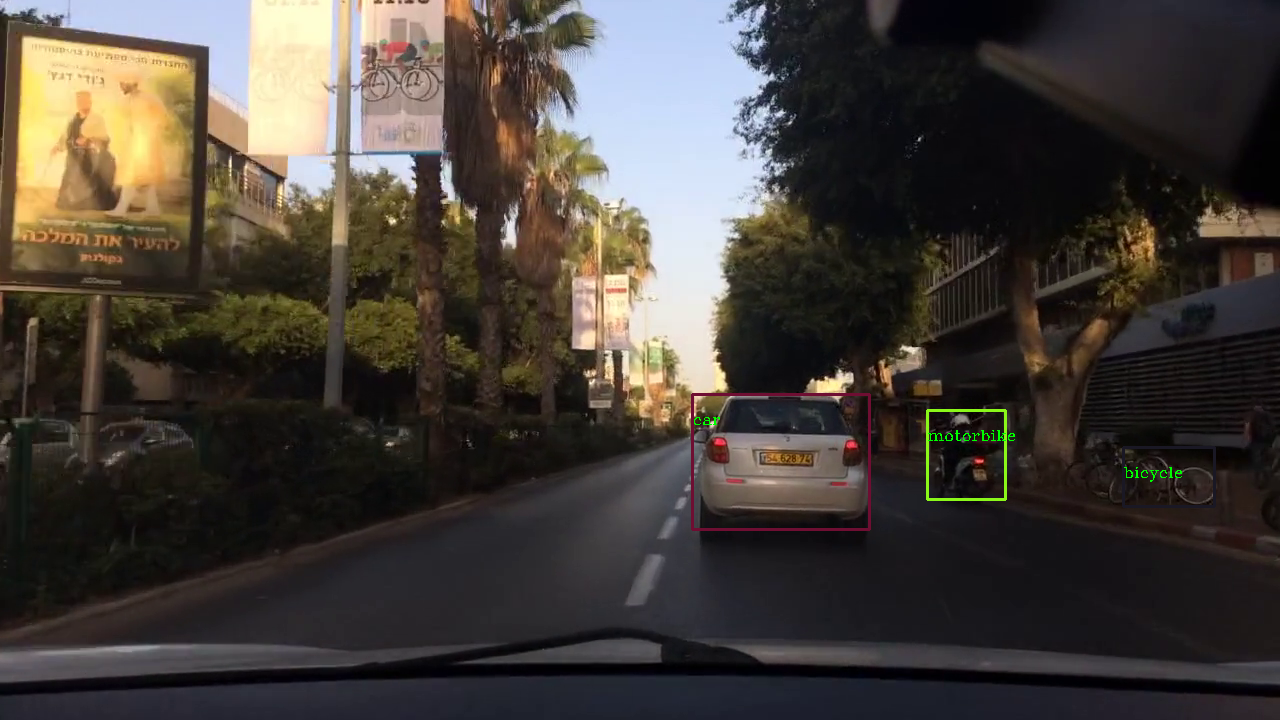

Done


In [29]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print("File load error")
  exit()

while True:
  ret, frame = cap.read()
  if frame is None:
    print("Done")
    break
  detectAndDisplay(frame)